In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
from craft import craco, craco_kernels, craco_plan, uvfits
from craco import preprocess
from craco import craco_candidate

# Andy's candidate plots

In [115]:
cand_query_dict = {
    'sbid': '49744', 'beam': '02', 'dm': '0', 'lpix': '40', 'mpix': '214', 
    'ra': '279.758', 'dec': '-10.5304', 'totalsample': '74438', 'scan': '00', 
    'tstart': "20230428152550", 'results': 'results', 'boxcwidth': "6", 'npzfname': 
    'SB50705_B31_results_102_150_t2991.npz', 
    'uvfitspath': '/data/seren-03/big/craco/SB049744/scans/00/20230428152550/results/b02.uvfits', 
    'calpath': '/data/seren-01/big/craco/SB049744/cal/02/b02.aver.4pol.smooth.npy'
}

crow = {
    "ra_deg": float(cand_query_dict["ra"]), "dec_deg": float(cand_query_dict["dec"]),
    "dm_pccm3": float(cand_query_dict["dm"]), "total_sample": int(cand_query_dict["totalsample"]),
    "boxc_width": int(cand_query_dict["boxcwidth"]), 
    "lpix": int(cand_query_dict["lpix"]), "mpix": int(cand_query_dict["mpix"]),
}

cand = craco_candidate.Candidate(
    crow = crow,
    uvsource = cand_query_dict["uvfitspath"],
    calibration_file = cand_query_dict["calpath"],
    workdir="./test", padding=2, planargs="--ndm 2 --npix 256"
)

cand.search_output["obstime_sec"] = cand.search_output["total_sample"] * cand.tsamp

parsing values --ndm 2 --npix 256


/home/gup037/Codes/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'CRACO_ULP1_beam0', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 279.00128838450553, -11.271863057834889, 2000.0, 279.00128838450553, -11.271863057834889, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=515.0 2-3 uvpix=(0, 254)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=787.0 3-19 uvpix=(0, 211)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=787.0

Upper registers [(2, 1), (3, 1), (8, 1), (9, 1), (10, 1), (40, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (196, 1), (197, 1), (198, 1), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1)]
Lower registers [(2, 3), (2, 4), (4, 5), (3, 9), (4, 9), (4, 10), (7, 12), (7, 13), (8, 13), (8, 14), (7, 17), (7, 18), (7, 19), (8, 19), (13, 19), (14, 19), (7, 20), (8, 20), (14, 20), (15, 20), (1, 21), (7, 21), (12, 21), (13, 21), (15, 21), (20, 21), (1, 22), (4, 22), (7, 22), (8, 22), (13, 22), (15, 22)]


In [116]:
cand._calibrate_data(cand.calibration_file)
cand._rotate_vis()
cand._normalise_vis()
cand._load_burst_filterbank()
cand._normalise_vis(target=False)
cand._dedisperse_block(dm=cand.search_output["dm_pccm3"])

cand._grid_image_data()

In [117]:
cand.visrange

(74430, 74440)

<IPython.core.display.Javascript object>


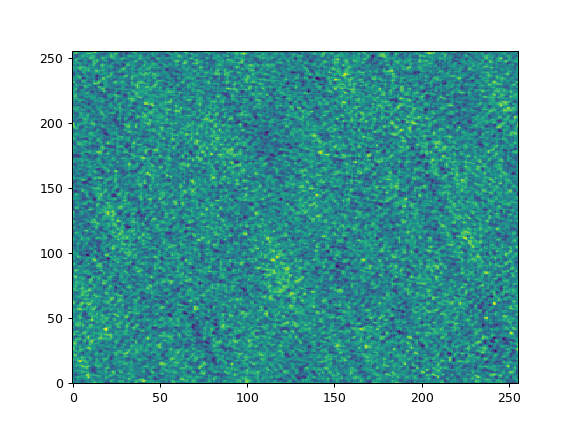

In [118]:
plt.figure()
plt.imshow(cand.imgcube[8], aspect='auto', interpolation='None', origin='lower')

<IPython.core.display.Javascript object>


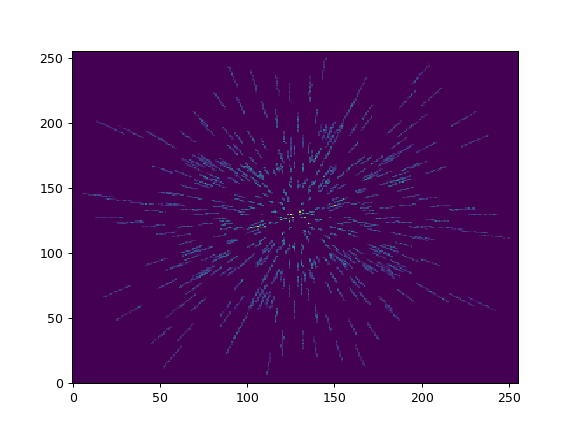

In [119]:
plt.figure()
plt.imshow(np.fft.fftshift(np.abs(cand.grid_data[..., 4])), aspect='auto', interpolation='None', origin='lower')

# Vivek's pretty_images

In [120]:
fname = "/home/gup037/tmp/b02.uvfits"  #ULP1 detection beam -- SB049744
calfile = cand_query_dict['calpath']
uvsource = uvfits.open(fname, skip_blocks=cand.visrange[0])
nt = cand.visrange[1] - cand.visrange[0] + 1

In [121]:
values = craco_plan.get_parser().parse_args([])
values.uv = fname
values.nt = nt

In [122]:
py_plan = craco_plan.PipelinePlan(uvsource, values)

/home/gup037/Codes/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'CRACO_ULP1_beam0', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 279.00128838450553, -11.271863057834889, 2000.0, 279.00128838450553, -11.271863057834889, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=515.0 2-3 uvpix=(0, 254)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=787.0 3-19 uvpix=(0, 211)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=787.0

Upper registers [(2, 1), (3, 1), (8, 1), (9, 1), (10, 1), (40, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (196, 1), (197, 1), (198, 1), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1)]
Lower registers [(2, 3), (2, 4), (4, 5), (3, 9), (4, 9), (4, 10), (7, 12), (7, 13), (8, 13), (8, 14), (7, 17), (7, 18), (7, 19), (8, 19), (13, 19), (14, 19), (7, 20), (8, 20), (14, 20), (15, 20), (1, 21), (7, 21), (12, 21), (13, 21), (15, 21), (20, 21), (1, 22), (4, 22), (7, 22), (8, 22), (13, 22), (15, 22)]


In [123]:
block_dtype = np.ma.core.MaskedArray
gridder = craco_kernels.Gridder(uvsource, py_plan, values)
imager = craco_kernels.Imager(uvsource, py_plan, values)
calibrator = preprocess.Calibrate(py_plan, block_dtype = block_dtype, miriad_gains_file=calfile, baseline_order=py_plan.baseline_order)
brute_force_ddp = preprocess.Dedisp(freqs = py_plan.freqs, tsamp = py_plan.tsamp_s.value, baseline_order=py_plan.baseline_order, dm_pccc= float(cand_query_dict['dm']))

In [124]:
blocker = uvsource.time_blocks_with_uvws(nt = nt)

In [125]:
block, uvws = next(blocker)

In [126]:
block = craco.bl2array(block)

In [127]:
block.shape

(253, 120, 1, 11)

### Checking if the input data is exactly the same

In [128]:

np.all(block == cand.burst_data)

True

In [129]:
calblock = calibrator.apply_calibration(block)

### Checking if the calibrated data is exactly the same

In [130]:
np.all(calblock == cand.cal_data)

True

In [131]:
normblock = preprocess.normalise(calblock, target_input_rms=1)

### Checking if the normalised block is exactly the same

In [132]:
np.all(normblock == cand.norm_data_pc)

True

In [133]:
avgblock = preprocess.average_pols(normblock, keepdims=False)

### Checking if the pol averaged data is exactly the same

In [134]:
np.all(avgblock == cand.norm_data_pc[..., 0, :])

True

In [135]:
ddpblock = brute_force_ddp.dedisperse(0, avgblock)

### Checking if the ddp data is exactly the same

In [136]:
np.all(ddpblock[..., :-1] == cand.dedisp_data)

False

In [137]:
cand.dedisp_data.shape

(253, 120, 10)

In [138]:
ddpblock.shape

(253, 120, 11)

<IPython.core.display.Javascript object>


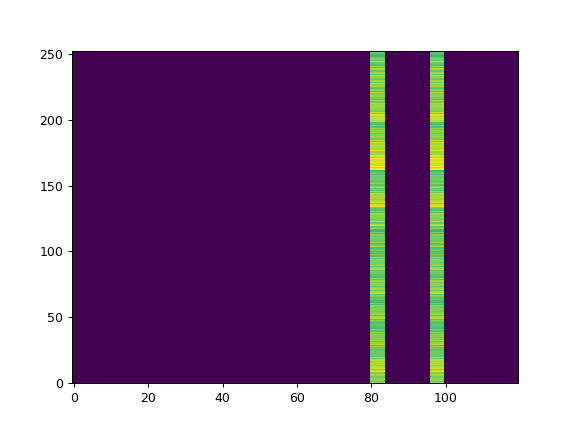

In [139]:
plt.figure()
plt.imshow(np.abs(ddpblock[..., :-1] - cand.dedisp_data)[..., 2], aspect='auto', interpolation='None', origin='lower')

In [140]:
cand.dedisp_data[:, 80, 2]

masked_array(data=[-7.18658417e-03-2.61483295e-03j,
                    7.20106764e-03-2.37208069e-03j,
                   -6.91003539e-03-3.62871564e-03j,
                    1.11163210e-03+7.58190406e-03j,
                    2.41240574e-04-7.39033427e-03j,
                   -3.41485674e-03+7.12161744e-03j,
                   -3.42715974e-03-7.48772174e-03j,
                   -3.01936385e-03+6.79978635e-03j,
                    8.85474496e-03-1.85408466e-03j,
                    5.10423398e-03-6.81737717e-03j,
                   -4.83455323e-03+5.97652514e-03j,
                   -6.71997666e-03-5.34972036e-03j,
                   -7.10722897e-03+3.97897745e-03j,
                   -6.89836638e-03+3.75717529e-03j,
                   -3.49055231e-03+7.44842971e-03j,
                   -7.21455377e-04-8.18693545e-03j,
                   -7.56578567e-03+2.35271151e-03j,
                    4.39216476e-03+7.20989844e-03j,
                    4.29870375e-03-5.91843994e-03j,
            

In [141]:
ddpblock[:, 80, 2]

masked_array(data=[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                   0.+0.j

In [142]:
avgblock[:, 80, 2]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --

### Debugging the Dedisperser now

In [152]:

def get_dm_delays(dm_samps, freqs):
    '''
    Returns delays for each freq in freqs array
    dm_samps is the total delay across the whole band
    delay for fmin will be zero
    '''
    fmin = np.min(freqs)
    fmax = np.max(freqs)
    delay = dm_samps * (1 / fmin**2 - 1 / freqs**2)  / (1 / fmin**2 - 1 / fmax**2)
    delay_samps = np.round(delay).astype(int)
    return delay_samps

def get_dm_pccc(freqs, dm_samps, tsamp):
    '''
    freqs in Hz
    tsamp in s
    '''
    delay_s = dm_samps * tsamp
    fmax = np.max(freqs) * 1e-9
    fmin = np.min(freqs) * 1e-9
    dm_pccc = delay_s / 4.15 / 1e-3 / (1 / fmin**2 - 1 / fmax**2)
    return dm_pccc

def get_dm_samps(freqs, dm_pccc, tsamp):
    '''
    freqs in Hz
    tsamp in s
    '''
    fmax = np.max(freqs) * 1e-9
    fmin = np.min(freqs) * 1e-9
    delays_s = 4.15 * 1e-3 * dm_pccc * (1 / fmin**2 - 1 / fmax**2)
    
    delays_samps = np.round(delays_s / tsamp).astype(int)
    dm_samps = delays_samps
    return dm_samps

class Test_Dedisp:
    def __init__(self, freqs, tsamp, baseline_order, dm_samps = None, dm_pccc = None):
        self.fch1 = freqs[0]
        self.foff = np.abs(freqs[1] - freqs[0])
        self.freqs = freqs
        self.nchans = len(self.freqs)
        self.baseline_order = baseline_order
        if dm_samps is None:
            if dm_pccc is None:
                raise ValueError("You need to specify either dm_samps or dm_pccc")
            dm_samps = get_dm_samps(freqs, dm_pccc, tsamp)

        self.delays_samps = get_dm_delays(dm_samps, self.freqs)
        #print(f"The computed delays_samps are: {self.delays_samps}")
        self.dm = dm_samps
        self.dm_pccc = get_dm_pccc(freqs, dm_samps, tsamp)
        self.dm_history = None

    def dedisperse(self, iblock, inblock):

        if type(inblock) == dict:
            block = bl2array(inblock)
        elif type(inblock) in [np.ndarray, np.ma.core.MaskedArray]:
            block = inblock
        else:
            raise TypeError(f"Expected either np.ndarray or np.ma.core.MaskedArray or dict, but got {type(block)}")

        if iblock == 0:
            history_shape = list(block.shape)
            history_shape[-1] = self.dm
            history_shape = tuple(history_shape)

            self.dm_history = np.zeros(history_shape, dtype=block.dtype)

        attached_block = np.concatenate([self.dm_history, block], axis=-1)
        rolled_block = np.zeros_like(attached_block)
        for ichan in range(self.nchans):
            rolled_block[:, ichan, ...] = np.roll(attached_block[:, ichan, ...], self.delays_samps[ichan])

        self.dm_history = attached_block[..., -self.dm:]
        
        if type(inblock) == dict:
            for ibl, blid in enumerate(self.baseline_order):
                inblock[blid] = rolled_block[ibl, ..., self.dm:]
            return inblock

        return rolled_block[..., self.dm:]
   

In [167]:
np.all(brute_force_ddp.freqs == cand.dedisperser.freqs), np.all(brute_force_ddp.delays_samps == cand.dedisperser.delays_samps), np.all(brute_force_ddp.baseline_order == cand.dedisperser.baseline_order)

(True, True, True)

In [168]:
np.all(brute_force_ddp.dm_history == cand.dedisperser.dm_history)

False

In [170]:
test_ddper_vg = Test_Dedisp(py_plan.freqs, tsamp = py_plan.tsamp_s.value, dm_pccc=float(cand_query_dict['dm']), baseline_order= py_plan.baseline_order)
test_ddper_aw = Test_Dedisp(py_plan.freqs, tsamp = py_plan.tsamp_s.value, dm_pccc=float(cand_query_dict['dm']), baseline_order= py_plan.baseline_order)

In [171]:
np.all(test_ddper_vg.dedisperse(0, cand.norm_data_pc[..., 0, :]) == test_ddper_aw.dedisperse(0, avgblock))

False

In [192]:
indata = cand.norm_data_pc[..., 0, :]
indata = avgblock
history_shape = list(indata.shape)
history_shape[-1] = test_ddper_aw.dm
history_shape = tuple(history_shape)
dm_history = np.zeros(history_shape, dtype=indata.dtype)

In [193]:
attached_block = np.concatenate([dm_history, indata], axis=-1)

In [194]:
np.all(attached_block == indata)

True

In [197]:
cand.norm_data_pc[:, 80, 0, 2].filled()

array([1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j,
       1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+0.j, 1.e+20+

In [198]:
cand.norm_data_pc[..., 0, :]

masked_array(
  data=[[[(0.2584159673752881+0.7067016010351796j),
          (0.7231438050174401+0.6320350865185133j),
          (1.4033508562021053-0.7535966916040381j), ...,
          (-0.4502553152586852-2.7564852236893276j),
          (-1.614730433085192+0.34959238143849974j),
          (-0.11648498464763714-0.7102341472561345j)],
         [(-0.36124083892439673+2.835649088585717j),
          (-0.3269744999378818+0.8601528289227061j),
          (1.3609842531223004-0.6810004543199464j), ...,
          (-0.05723810072051117+0.7453611196561453j),
          (-0.2125283333035165-0.10810220217701773j),
          (0.46541720537366216-0.9471806184496707j)],
         [(-0.5212140449938591+1.203487675789942j),
          (0.42921672695562485-0.8450182252202966j),
          (-0.6176006648691714+0.7143696254133377j), ...,
          (-1.4042971830796362-0.662948402578778j),
          (-0.21523649165754302+0.5079334525360136j),
          (-0.5101730813106155+0.800170515363805j)],
         ...,
   

In [201]:
np.all(avgblock.mask == cand.norm_data_pc.mask[:, :, 0, :])

True